# California housing price prediction
<img src= "images/california_houses.png" width = 100%>

## This notebook uses the most known machine learning algorithms to predict the price of the houses in California. 

<a id="0"></a> <br>
## Table of Contents  
1. [Get the data](#1)
    1. [Reading the data](#1.1)
    2. [Taking a quick look at the data structure](#1.2)
    3. [Creating a test set](#1.3) 
2. [Visualizing the data to gain insights](#2)
    1. [Visualizing geographical data](#2.1)
    2. [Looking for correlations](#2.2)
    3. [Creating new attribute combinations](#2.3)
3. [Preparing the data for machine learning algorithm](#3)
    1. [Data cleaning](#3.1)
    2. [Handling categorical attributes](#3.2)
    3. [Creating my own transformers](#3.3)
    4. [Transformation pipelines](#3.4)
4. [Selecting and training a model](#4)
    1. [Training and evaluating on the training Set](#4.1)
    2. [Better evaluation using cross-validation](#4.2)
5. [Fine-Tune the Model](#5)
    1. [Grid search](#5.1)
    2. [Randomized search](#5.2)
    3. [Analyzing the most important attributes for grid search and randomized search](#5.3)
    4. [Evaluating our model on the test set](#5.4)

<a id="1"></a>
# 1. Get the data
[back to the top](#0)

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

<a id="1.1"></a>
## 1.1 Reading the data
[back to the top](#0)

In [2]:
import pandas as pd

df_housing = pd.read_csv("data/housing.csv")

<a id="1.2"></a>
## 1.2 Taking a quick look at the data structure
[back to the top](#0)

In [3]:
# The first 5 rows of the dataset
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# The last 5 rows of the dataset
df_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
# Show the type of each feature and the existence of missing values
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


One can conclude that, with the exception of 'ocean_proximity' attribute, the rest of the data is numeric and there are 207 missing values in 'total_bedrooms' feature.

Let's take a look at values in the 'ocean_proximity' attribute:

In [6]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Ok, there are 5 possible categorical values for 'ocean_proximity'. As will be discussed further, we will have to transform this categorical variable into a numeric variable.

In [7]:
# Key statistics metrics
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


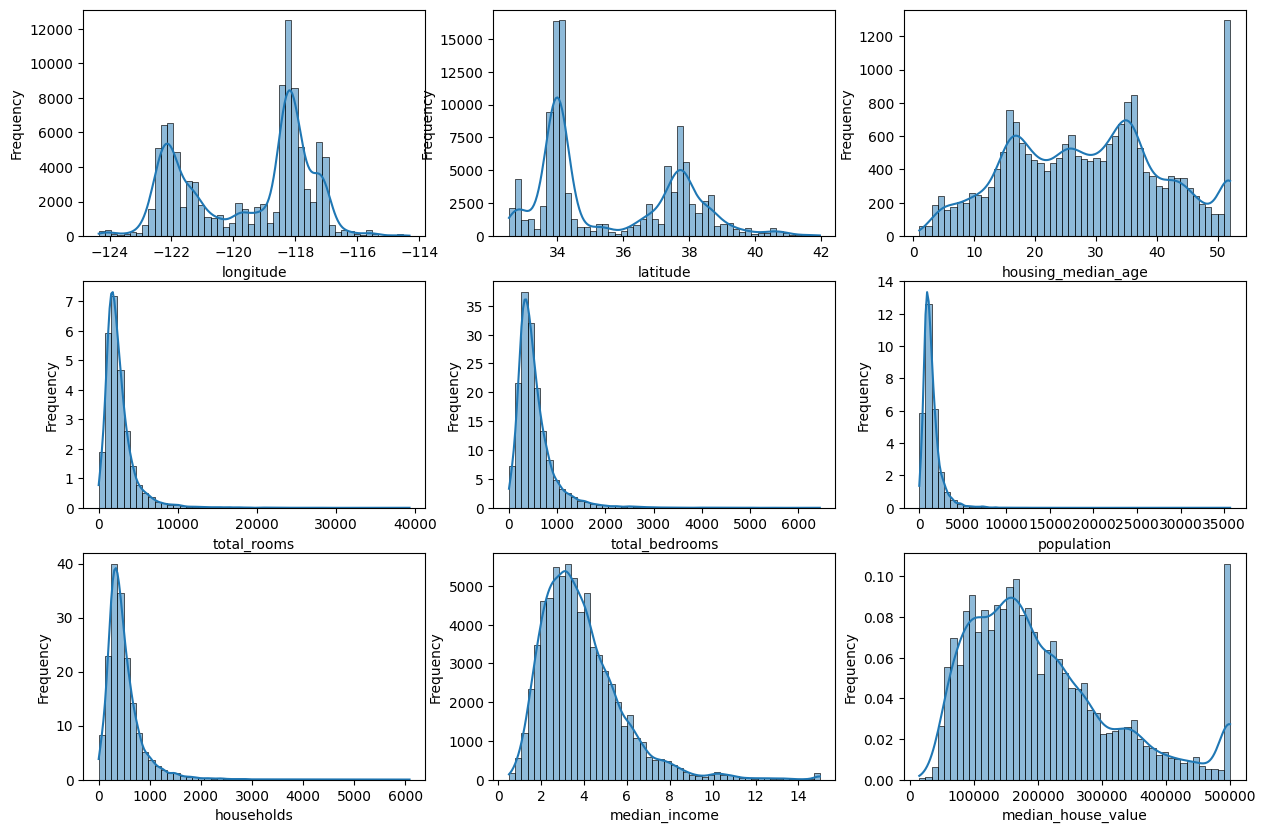

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of all numeric features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
grid = {0: (0, 0), 1: (0, 1), 2: (0, 2),
        3: (1, 0), 4: (1, 1), 5: (1, 2),
        6: (2, 0), 7: (2, 1), 8: (2, 2)}
for i, feature in enumerate(df_housing.describe().columns):
    sns.histplot(df_housing[feature], bins = 50, ax = axes[grid[i]], kde = True, stat = "frequency")

From this histograms, one can notice a few things:
1. The 'median_income' attribute doesn't look like it is expressed in US dollars. It looks like the data has been scaled and capped at 15.0001.
2. The 'housing_median_age' and the 'median_house_value' were also capped.
3. The attributes have different scales. It will be handled carefully later on.
4. Most histograms are right skewed. Later on we will try to tranform these attributes to look like a bell-shaped distribution.

<AxesSubplot: title={'center': "Pearson's correlation"}>

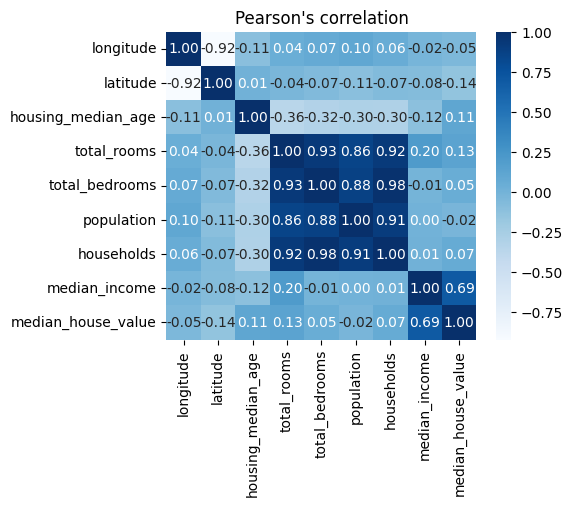

In [9]:
# Pearson's correlation
correlation = df_housing.corr(method="pearson")
plt.subplots(figsize=(5,4))
plt.title("Pearson's correlation")
sns.heatmap(correlation, cmap="Blues", annot = True, fmt=".2f")

From the Pearson's correlation, It is clear that the 'meadian_income' is directly correlated to the 'media_house_values'.

<a id="1.3"></a>
## 1.3 Creating a test set
[back to the top](#0)

Since the 'meadian_income' is directly correlated to the feature that we are trying to predict, let's ensure that the test set is representative of the various categories of income across the entire dataset. So, allow us to divide the 'median income' feature into 5 subcategories and store it in a new feature called 'income_cat'.  

In [10]:
import numpy as np

df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])

In order to build a representative dataset, we can use the function StratifiedShuffleSplit from scikit-learn, as follows:

In [11]:
# Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_housing = df_housing.loc[train_index]
    strat_test_housing = df_housing.loc[test_index]

Another way to split the dataset is to do a random sampling, but this method is less accurate than stratified sampling. Let's compare the two methods:

In [12]:
# Random sampling
from sklearn.model_selection import train_test_split

rand_train_housin, rand_test_housing = train_test_split(df_housing, test_size=0.2, random_state=42)

# Comparison between Stratified sampling and Random sampling
compare_rand_strat = pd.DataFrame({
    "Overall": df_housing["income_cat"].value_counts() / len(df_housing),
    "Stratified": strat_test_housing["income_cat"].value_counts() / len(strat_test_housing),
    "Random": rand_test_housing["income_cat"].value_counts() / len(rand_test_housing),
}).sort_index()
compare_rand_strat["Rand. %error"] = 100 * compare_rand_strat["Random"] / compare_rand_strat["Overall"] - 100
compare_rand_strat["Strat. %error"] = 100 * compare_rand_strat["Stratified"] / compare_rand_strat["Overall"] - 100

In [13]:
compare_rand_strat

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


As we have seen, a stratified sample is more accurate than a random sample. Now we can remove the 'income_cat' attribute.

In [14]:
for set_ in (strat_train_housing, strat_test_housing):
    set_.drop("income_cat", axis=1, inplace=True)

<a id="2"></a>
# 2. Visualizing the data to gain insights
[back to the top](#0)

Let's copy the test and training set so we can explore it without harming the main training set (strat_train_housing).

In [15]:
strat_train_copied = strat_train_housing.copy()
strat_test_copied = strat_train_housing.copy()

<a id="2.1"></a>
## 2.1 Visualizing geographical data
[back to the top](#0)

Let's see how 'median_price_value' behaves in relation to the districts location and population size.

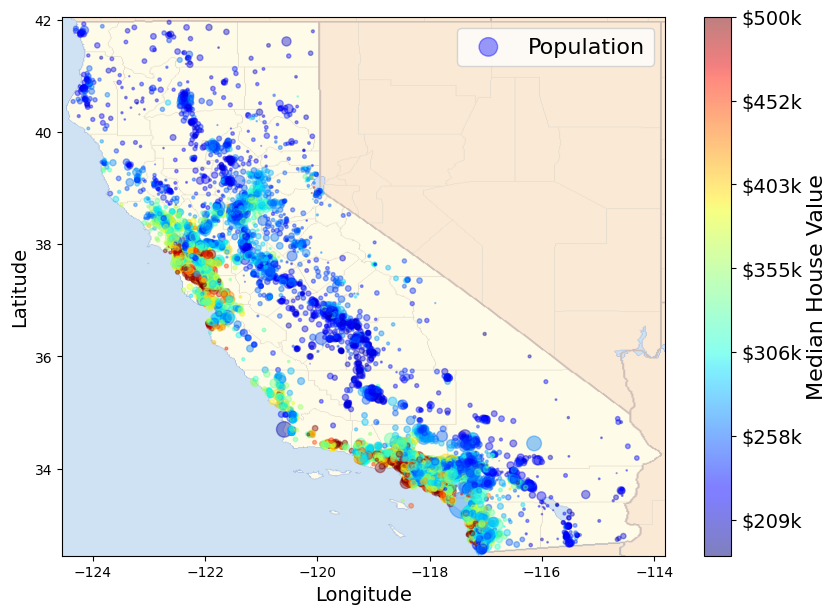

In [16]:
import matplotlib.image as mpimg

# Reading the California map image
california_img=mpimg.imread("images/california.png")

# Plotting the district location with a color map based on the media hause value and a mark size based on the population size.
ax = strat_train_copied.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=strat_train_copied['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# Image
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Color bar
prices = strat_train_copied["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

One can notice that the district locations and the population size are closly related to the housing prices. The 'ocean_proximity' attribute may be an important feature, but it's not that simple, as the prices in Northern California are not too high.

<a id="2.2"></a>
## 2.2 Looking for correlations
[back to the top](#0)

Let's go back to the Pearson's correlation in item 1.2, but using our train set, to see which attributes are closly related to the 'median_house_value'.

In [17]:
corr_matrix = strat_train_copied.corr(method="pearson")
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The 'median_income' attribute is the most related to the 'median_house_value'. Let's look at the scatter matrix of the 4 most related attributes:

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

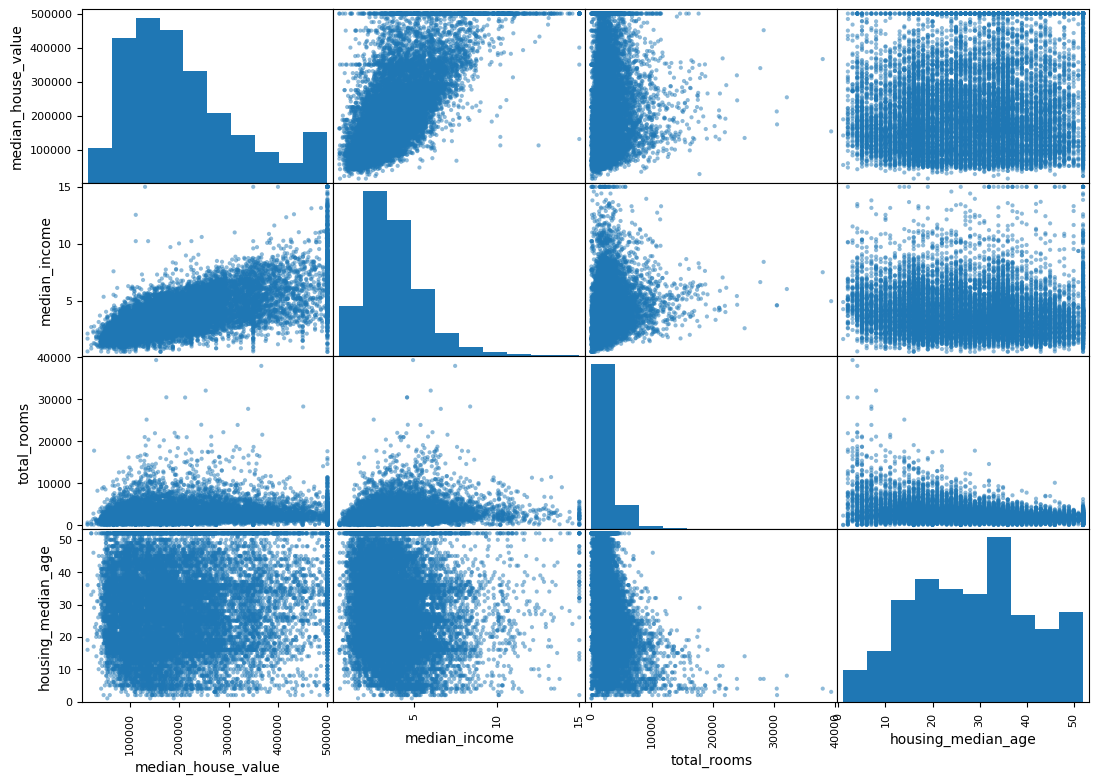

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(strat_train_copied[attributes],figsize=(13, 9))

When we look at the 'median_income' x 'median_house_value' scatter plot, we can see that there really is a strong correlation between them and that the data is capped at median_house_value = 500k.

<a id="2.3"></a>
## 2.3 Creating new attribute combinations
[back to the top](#0)

Some features of this dataset don't seem to add much information to our model, as it's the case of 'total_rooms', 'population' and 'total_bedrooms'. So, let's create three new features: 'total_rooms_per_household', 'population_per_household' and 'bedrooms_per_room'.

In [19]:
strat_train_copied["total_rooms_per_household"] = strat_train_copied["total_rooms"]/strat_train_copied["households"]
strat_train_copied["population_per_household"] = strat_train_copied["population"]/strat_train_copied["households"]
strat_train_copied["bedrooms_per_room"] = strat_train_copied["total_bedrooms"]/strat_train_copied["total_rooms"]

In [20]:
corr_matrix_new_features = strat_train_copied.corr()
corr_matrix_new_features["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
total_rooms_per_household    0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
population_per_household    -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

<a id="3"></a>
# 3. Preparing the data for machine learning algorithm
[back to the top](#0)

Let's separate the predictors and the labels from the strat_train_housing dataset, since we won't necessarily apply the same transformations to the predictor and the target values.

In [21]:
housing = strat_train_housing.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_housing["median_house_value"].copy()

Now, allow us to create a copy of the data without the categorical attribute 'ocean_proximity'.

In [22]:
housing_num = housing.drop("ocean_proximity", axis = 1)

<a id="3.1"></a>
## 3.1 Data cleaning
[back to the top](#0)

As we've seen in item 1.2, there are 207 missing values in 'total_bedrooms' attribute and we have three alternatives:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Impute some values like mean, median, most frequent or any other constant.

Let's take a look at the third alternative.

In [23]:
# Let's import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# Defining the median as the strategy to be used, since it's less sensitive to outliers
imputer = SimpleImputer(strategy = "median")

imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [24]:
X = imputer.transform(housing_num)
housing_num_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
print("Now we have", str(housing_num_tr["total_bedrooms"].isnull().sum()), "missing values")

Now we have 0 missing values


<a id="3.2"></a>
## 3.2 Handling categorical attributes
[back to the top](#0)

So far we have only dealt with numerical attributes, but now let's look at the categorical attribute 'ocean_proximity'.

In [25]:
housing_cat = housing[["ocean_proximity"]]

Let's see the amount of each value in this feature:

In [26]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

So allow me to transform the categorical attribute into numerical attribute by using OneHotEncoder method.

In [27]:
# First we need import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Ok, that's exactly what we want for our categorical attribute and we'll apply it in our pipeline.

<a id="3.3"></a>
## 3.3 Creating my own transformers
[back to the top](#0)

Creating our own tranformer to add the new features studied previously in item 2.3.

In [28]:
# Import BaseEstimator and TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

# Get the columns indices
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

# Transformer that creates and adds the three new features analyzed in item 2.3.
class NewAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = NewAttributesAdder(add_bedrooms_per_room=False)
housing_new_attribs = attr_adder.transform(housing.values)

In [29]:
housing_new_attribs_tr = pd.DataFrame(housing_new_attribs,
                                      columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
                                      index=housing.index)
housing_new_attribs_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


<a id="3.4"></a>
## 3.4 Transformation pipelines
[back to the top](#0)

Let's use the pipeline function from sklearn library to apply all the tranformations to our data in the correct order.

In [30]:
# Import Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("attribs_adder", NewAttributesAdder()),
                         ("std_scaler", StandardScaler()),])

In [31]:
# Import ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)

In [32]:
housing_prepared_tr = pd.DataFrame(housing_prepared,
                                   columns=list(housing_num.columns)+
                                   ["rooms_per_household", "population_per_household", "bedrooms_per_room", "hot1", "hot2", "hot3", "hot4", "hot5"],
                                   index=housing.index)
housing_prepared_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,hot1,hot2,hot3,hot4,hot5
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


We have a preprocessing pipeline that applies the appopriate tranformations to the full housing data.

<a id="4"></a>
# 4. Selecting and training a model
[back to the top](#0)

Finally! after explored the problem, sampled a training set and a test set and wrote trasformation pipelines to clean up and prepare the data for machine learning algorithms, we are ready to select and train a machine learning model.

<a id="4.1"></a>
## 4.1 Training and evaluating on the training Set
[back to the top](#0)

Let's begin with **Linear regression**:

In [33]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Training the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [34]:
linear_reg_predictions = linear_reg.predict(housing_prepared)

Now we can measure this regression model with the Mean Square Error and Mean Absolute Error

In [35]:
from sklearn.metrics import mean_squared_error

linear_reg_mse = mean_squared_error(housing_labels, linear_reg_predictions)
linear_reg_rmse = np.sqrt(linear_reg_mse)
print("The mean square error for linear regression is:", linear_reg_rmse)

The mean square error for linear regression is: 68634.19939446161


In [36]:
from sklearn.metrics import mean_absolute_error

linear_reg_mae = mean_absolute_error(housing_labels, linear_reg_predictions)
print("The mean absolute error for linear regression is:", linear_reg_mae)

The mean absolute error for linear regression is: 49466.631116763565


These errors are not very satisfying, since the median_housing_values range between 120k and 265k. That's definitaly not a great score. It looks like our model is underfitting. 

Let's try to use the **Decision tree regressor**.

In [37]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [38]:
decision_tree_predictions = decision_tree_reg.predict(housing_prepared)
decision_tree_reg_mse = mean_squared_error(housing_labels, decision_tree_predictions)
decision_tree_reg_rmse = np.sqrt(decision_tree_reg_mse)
print("The mean square error for decision tree is:", decision_tree_reg_rmse)

The mean square error for decision tree is: 0.0


Our model seems to be overfitting the data.

<a id="4.2"></a>
## 4.2 Better evaluation using cross-validation
[back to the top](#0)

One alternative is use the K-fold cross validation to randomly splits our training set into 10 subsets called folds and evaluate the decision tree 10 times. Let's try it!

In [39]:
from sklearn.model_selection import cross_val_score

decision_tree_scores = cross_val_score(decision_tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
decision_tree_rmse_scores = np.sqrt(-decision_tree_scores)

In [40]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(decision_tree_rmse_scores)

Scores: [73672.48453146 70933.41714482 70152.81600207 69912.44885272
 70156.99613555 75094.64503433 71892.29206553 73488.78586567
 68668.22719927 70549.08621918]
Mean: 71452.11990505978
Standard deviation: 1926.407856771016


Just to be sure, let's do the same to the linear regression.

In [41]:
linear_reg_scores = cross_val_score(linear_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)

In [42]:
display_scores(linear_reg_rmse_scores)

Scores: [71777.6526835  64114.99166359 67771.17124356 68613.53563082
 66830.07826384 72549.78052544 73997.08050233 68830.96225316
 66443.28836884 70144.72439169]
Mean: 69107.32655267534
Standard deviation: 2885.8084401679685


Decision tree model is clearly overfitting the data, since it performs worse than lienar regression model

**Random forest regressor:**

In [43]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(housing_prepared, housing_labels)

random_forest_predictions = random_forest_reg.predict(housing_prepared)
random_forest_reg_mse = mean_squared_error(housing_labels, random_forest_predictions)
random_forest_reg_rmse = np.sqrt(random_forest_reg_mse)
print("The mean square error for random forest is:", random_forest_reg_rmse)

The mean square error for random forest is: 18728.150995070697


In [44]:
random_forest_scores = cross_val_score(random_forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)

display_scores(random_forest_rmse_scores)

Scores: [51624.49577263 49031.86957384 46692.8092778  51934.8301209
 47510.9711337  51836.5348193  52262.42897084 50073.54459816
 48938.74657477 53794.23235028]
Mean: 50370.046319222594
Standard deviation: 2170.312760401394


Random forest seems to perform better than the others models, but it's still overfitting the data, since the score on the training set is still much lower than on the validation sets.

**k-nearest neighbors (KNN)**

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(housing_prepared, housing_labels)

knn_predictions= knn_reg.predict(housing_prepared)
knn_reg_mse = mean_squared_error(housing_labels, knn_predictions)
knn_reg_rmse = np.sqrt(knn_reg_mse)
print("The mean square error for SVM is:", knn_reg_rmse)

The mean square error for SVM is: 49832.19186662649


In [46]:
knn_scores = cross_val_score(knn_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)

display_scores(knn_rmse_scores)

Scores: [65167.64959479 59120.5900113  57331.5343357  66253.68599958
 59972.97479182 63185.90406458 62279.6050921  62747.9198944
 60440.20157013 65228.82974298]
Mean: 62172.8895097384
Standard deviation: 2773.5462809632822


**Suport Vector Machine regressor:**

In [47]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

svm_predictions = svm_reg.predict(housing_prepared)
svm_reg_mse = mean_squared_error(housing_labels, svm_predictions)
svm_reg_rmse = np.sqrt(svm_reg_mse)
print("The mean square error for SVM is:", svm_reg_rmse)

The mean square error for SVM is: 111095.06635291968


In [48]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)

display_scores(svm_rmse_scores)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard deviation: 2600.840269089257


This one performed worse than all the models we tried.

<a id="5"></a>
# 5. Fine-Tune the Model
[back to the top](#0)

Now we've seen that the Random Forest model is the best performer on our training set, let's go a little deeper and try to find the set of parameters that gives us the best result.

<a id="5.1"></a>
## 5.1 Grid search
[back to the top](#0)

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
              {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},]

randon_forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
print("The best parameters are", grid_search.best_params_, "resulting in a score of", np.sqrt(-grid_search.best_score_))

The best parameters are {'max_features': 8, 'n_estimators': 30} resulting in a score of 49861.07587291138


In [51]:
grid_search_results = pd.DataFrame(np.sqrt(-grid_search.cv_results_["mean_test_score"]), columns = ["mean_test_score"])
grid_search_results["params"] = grid_search.cv_results_["params"]
grid_search_results

,mean_test_score,params
0,63274.762518,"{'max_features': 2, 'n_estimators': 3}"
1,55798.639092,"{'max_features': 2, 'n_estimators': 10}"
2,52649.117473,"{'max_features': 2, 'n_estimators': 30}"
3,60571.742946,"{'max_features': 4, 'n_estimators': 3}"
4,52873.535860,"{'max_features': 4, 'n_estimators': 10}"
5,50419.039213,"{'max_features': 4, 'n_estimators': 30}"
6,59128.051180,"{'max_features': 6, 'n_estimators': 3}"
7,52273.541177,"{'max_features': 6, 'n_estimators': 10}"
8,49998.320826,"{'max_features': 6, 'n_estimators': 30}"
9,57957.469655,"{'max_features': 8, 'n_estimators': 3}"


<a id="5.2"></a>
## 5.2 Randomized search
[back to the top](#0)

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8),}

random_forest_reg = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(random_forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FBBAE49150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FBBAD7F750>},
                   random_state=42, scoring='neg_mean_squared_error')

In [53]:
print("The best parameters are", random_search.best_params_, "resulting in a score of", np.sqrt(-random_search.best_score_))

The best parameters are {'max_features': 7, 'n_estimators': 180} resulting in a score of 49117.55344336652


In [54]:
random_search_results = pd.DataFrame(np.sqrt(-random_search.cv_results_["mean_test_score"]), columns = ["mean_test_score"])
random_search_results["params"] = random_search.cv_results_["params"]
random_search_results

,mean_test_score,params
0,49117.553443,"{'max_features': 7, 'n_estimators': 180}"
1,51450.632029,"{'max_features': 5, 'n_estimators': 15}"
2,50692.535882,"{'max_features': 3, 'n_estimators': 72}"
3,50783.614494,"{'max_features': 5, 'n_estimators': 21}"
4,49162.898775,"{'max_features': 7, 'n_estimators': 122}"
5,50655.798471,"{'max_features': 3, 'n_estimators': 75}"
6,50513.856320,"{'max_features': 3, 'n_estimators': 88}"
7,49521.172020,"{'max_features': 5, 'n_estimators': 100}"
8,50302.904408,"{'max_features': 3, 'n_estimators': 150}"
9,65167.020186,"{'max_features': 5, 'n_estimators': 2}"


The RandomizedSearchCV function found the best estimator for the random forest model.

<a id="5.3"></a>
## 5.3 Analyzing the most important attributes for grid search and randomized search
[back to the top](#0)

In [55]:
grid_feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_, columns = ["feature_importances"])
random_feature_importances = pd.DataFrame(random_search.best_estimator_.feature_importances_, columns = ["feature_importances"])

In [56]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"].categories_[0])
grid_feature_importances["attributes"] = np.array(num_attribs+extra_attribs+cat_one_hot_attribs)
random_feature_importances["attributes"] = np.array(num_attribs+extra_attribs+cat_one_hot_attribs)

In [57]:
#Plotting tables side by side
from IPython.display import display_html 

grid_styler = grid_feature_importances.sort_values("feature_importances", ascending=False, ignore_index=True).style.set_table_attributes("style='display:inline'").set_caption("grid_search")
random_styler = random_feature_importances.sort_values("feature_importances", ascending=False, ignore_index=True).style.set_table_attributes("style='display:inline'").set_caption("randomized_search")

display_html(grid_styler._repr_html_() + "\xa0"*10 + random_styler._repr_html_(), raw=True)

,feature_importances,attributes
0,0.391749,median_income
1,0.147114,INLAND
2,0.110714,pop_per_hhold
3,0.071723,longitude
4,0.065528,latitude
5,0.051157,bedrooms_per_room
6,0.047558,rooms_per_hhold
7,0.044828,housing_median_age
8,0.015467,households
9,0.015089,total_rooms


<a id="5.4"></a>
## 5.4 Evaluating our model on the test set
[back to the top](#0)

After tweaking our model for a while, let's evaluate or final model on the test set.

In [58]:
if -grid_search.best_score_ < -random_search.best_score_:
    final_model = grid_search.best_estimator_
else:
    final_model = random_search.best_estimator_

X_test = strat_test_housing.drop("median_house_value", axis=1)
y_test = strat_test_housing["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Our model has found an root mean square error of", final_rmse)

Our model has found an root mean square error of 46981.841079394515


Let's comput a 95% confidence interval

In [59]:
from scipy import stats

# Comput a 95% confidence interval
confidence_interval = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence_interval, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45009.73121871, 48874.43992557])